In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from PyEMD import EEMD

In [30]:
import numpy as np
import pandas as pd


from pandas import read_csv
from pandas import DataFrame
from datetime import datetime
from matplotlib import pyplot
from pylab import mpl


from pandas import concat
from PyEMD import EEMD

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from keras.layers import Activation

from scipy import interpolate
import matplotlib.pyplot as plt

from keras import Input, Model
from keras.layers import Dense
from keras.models import load_model


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# from sklearn.ensemble import IsolationForest


def data_split(data, train_len, lookback_window,PRE_STEP):

    WINDOW_SIZE = 10
    train = data[:train_len]  
    test = data[train_len:]  

    features = []
    predict = []
    for i in range(len(train) - WINDOW_SIZE - PRE_STEP):
        end_ix = i + WINDOW_SIZE
        out_end_ix = end_ix + PRE_STEP
        x = train[i:end_ix]
        y = train[out_end_ix]
        features.append(x)
        predict.append(y)
    features = np.array(features)
    predict = np.array(predict)
    
    
    features1 = []
    predict1 = []
    for i in range(len(test) - WINDOW_SIZE - PRE_STEP):
        end_ix = i + WINDOW_SIZE
        out_end_ix = end_ix + PRE_STEP
        x = test[i:end_ix]
        y = test[out_end_ix]
        features1.append(x)
        predict1.append(y)
    features1 = np.array(features1)
    predict1 = np.array(predict1)

    return (features,predict, features1,predict1)



def data_split_LSTM(X_train, Y_train, X_test, y_test):  # data split f
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    Y_train = Y_train.reshape(Y_train.shape[0], 1)
    y_test = y_test.reshape(y_test.shape[0], 1)
    return (X_train, Y_train, X_test, y_test)


def imf_data(data, lookback_window):
    X1 = []
    for i in range(lookback_window, len(data)):
        X1.append(data[i - lookback_window:i])
    X1.append(data[len(data) - 1:len(data)])
    X_train = np.array(X1)
    return X_train


def visualize(history):
    plt.rcParams['figure.figsize'] = (10.0, 6.0)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def LSTM_Model(X_train, Y_train,i):

    from keras.layers import LeakyReLU
    from tensorflow.keras.optimizers import Adam
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), 
    stateful=False, return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(LSTM(128, activation='relu', return_sequences = True))
    model.add(LSTM(128, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.001), metrics='MeanSquaredError')
    model.fit(X_train, Y_train, epochs=100, verbose=2, shuffle=False)
    return (model)


def RMSE(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse


def MAPE(Y_true, Y_pred):
    Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
    return np.mean(np.fabs((Y_true - Y_pred) / Y_true)) * 100

def calc_corr(a, b):
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b)
    cov_ab = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
    sq = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b]))

    corr_factor = cov_ab/sq

    return corr_factor
def ErIndx(test,prediction):
    sig=0.0
    for i in range(0,test.size):
        sig=sig+(test[i]-prediction[i])**2
    print("RMSE :",(sig*(1/test.size))**0.5)
    
    sig=0
    for i in range(0,test.size):
        sig=sig+((test[i]-prediction[i])/test[i])**2
    print("RRMSE :",(sig/test.size)**0.5*100)

    sig=0
    for i in range(test.size):
        sig=sig+((prediction[i]-test[i])**2)/(test[i]**2)
    print("RRMSE :",(sig/test.size)**0.5*100)


    sig1=0
    sig2=0
    for i in range(test.size):
        sig1=sig1+(test[i]-prediction[i])**2
        sig2=sig2+test[i]**2
    print("RRMSE Hamed Definition:",((sig1/sig2)**0.5)*100)

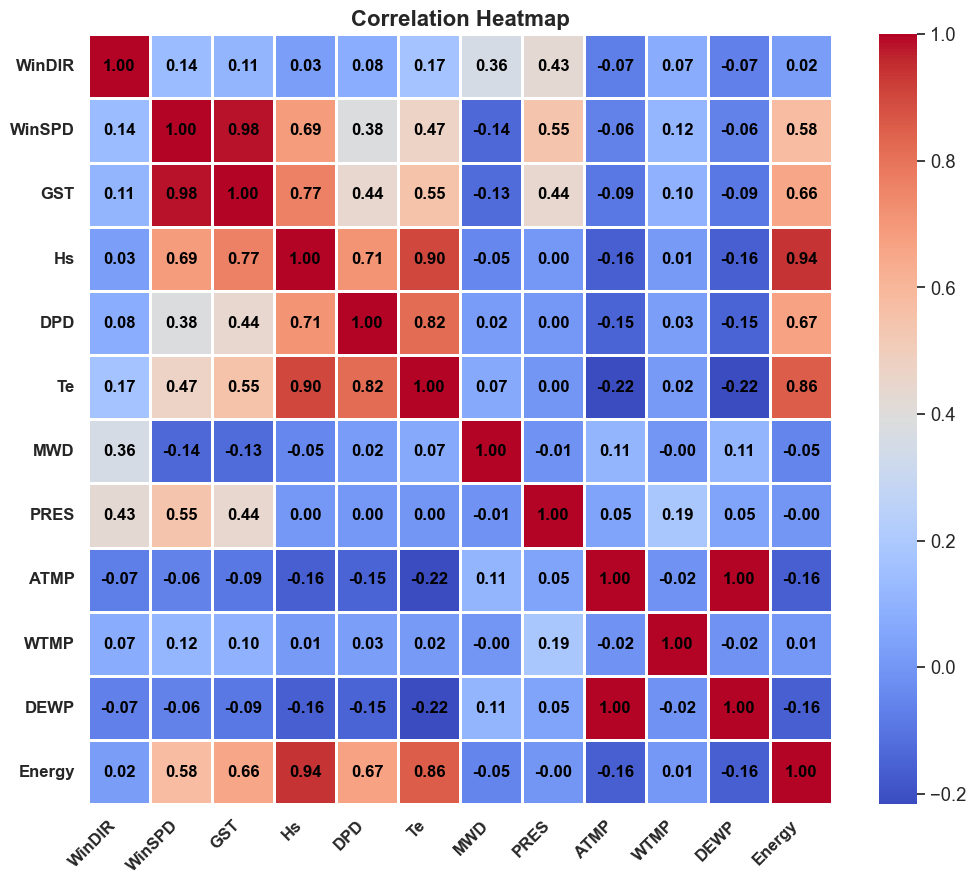

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Adjust figure size and general style
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'coolwarm'  # Use a more visually pleasing colormap

# Load dataset
dataset = pd.read_csv("C:/Users/ashkanreisi/Downloads/TestDataModified.csv", header=0, index_col=0, parse_dates=True)

# Columns to exclude
excluded_columns = ["VIS", "TIDE"]  # Replace with actual column names

# Rename a column (change "OldName" to the actual column name)
dataset = dataset.rename(columns={"APD": "Te"})  

# Create correlation matrix excluding specific columns
corr_matrix = dataset.drop(columns=excluded_columns).corr()

# Set a clean background style for seaborn
sns.set(style='white', font_scale=1.2)

# Generate heatmap with improved aesthetics
plt.figure(figsize=(12, 10))  
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, annot_kws={"size": 12, "weight": "bold", "color": "black"})

# Adjust text size, rotation, and appearance for labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, fontweight='bold')

# Optional: Add title for better context
plt.title("Correlation Heatmap", fontsize=16, weight='bold')

# Show the plot
plt.show()


In [48]:
# ****  MVI (Monthly variablity index) INDEX CALCULATION ****

#End of month indexes
Jan=736
Feb=1425
Mar=2146
Apr=2862
May=3599
Jun=4314
Jul=4451
#
Months=[0,Jan,Feb,Mar,Apr,May,Jun,Jul]
df = pd.DataFrame(dataset) 
monthly_mean_values=[]
for Month in range(len(Months)):
    if Month<len(Months)-1:
        values=df['Energy'][Month:Months[Month+1]].values
        monthly_mean_values.append(np.mean(values))
total_mean=np.mean(df['Energy'].values)
max_monthly_mean = max(monthly_mean_values)
min_monthly_mean = min(monthly_mean_values)

mvi = (max_monthly_mean - min_monthly_mean) / total_mean
print("MVI = ",mvi)

        

MVI =  0.45265138489258533


In [35]:
Month

7

In [74]:
# ****1st Element****
df = pd.DataFrame(dataset)  
df  = df.fillna(df.interpolate())
do1 = df['APD'][:]
do2 = df['Hs'][:]
do=do1

if do.equals(do1):
    variable='APD'
elif do.equals(do2):
    variable='Hs'       
    
DO = []
for i in range(0, len(do)):
    DO.append([do[i]])
    scaler_DO = MinMaxScaler(feature_range=(np.min(do), np.max(do)))
DO = scaler_DO.fit_transform(DO)

# set IMFs = 8
eemd = EEMD()
eemd.noise_seed(12345)
imfs1 = eemd.eemd(DO.reshape(-1),None,8)

c = int(len(DO) * .75)
# Look back
lookback_window = 10
imfs1_prediction = []

i = 1
for imf in imfs1:
   plt.subplot(len(imfs1), 1, i)
   plt.plot(imf)
   i += 1

plt.savefig('result_imf.png')
plt.show()

# Lead time = 30min*Pre_step ,if prtd
PRE_STEP = 24
test1 = np.zeros([len(DO) - c - lookback_window - PRE_STEP, 1])

KeyError: 'APD'

In [5]:
Tests1=[]
i = 1

for imf in imfs1:
    print('-'*45)
    print('This is  ' + str(i)  + '  time(s)')
    print('*'*45)
    X1_train, Y1_train, X1_test, Y1_test = data_split(imf_data(imf,1), c, lookback_window,PRE_STEP)
    X2_train, Y2_train, X2_test, Y2_test = data_split_LSTM(X1_train, Y1_train, X1_test, Y1_test)
    test1 += Y2_test
    model = LSTM_Model(X2_train,Y2_train,i) 
    prediction_Y = model.predict(X2_test)
    imfs1_prediction.append(prediction_Y)
    Tests1.append(Y2_test)
    i+=1;

---------------------------------------------
This is  1  time(s)
*********************************************
Epoch 1/100
104/104 - 3s - loss: 0.0072 - mean_squared_error: 0.0072 - 3s/epoch - 30ms/step
Epoch 2/100
104/104 - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - 1s/epoch - 14ms/step
Epoch 3/100
104/104 - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - 1s/epoch - 14ms/step
Epoch 4/100
104/104 - 2s - loss: 0.0072 - mean_squared_error: 0.0072 - 2s/epoch - 15ms/step
Epoch 5/100
104/104 - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - 1s/epoch - 14ms/step
Epoch 6/100
104/104 - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - 1s/epoch - 14ms/step
Epoch 7/100
104/104 - 2s - loss: 0.0072 - mean_squared_error: 0.0072 - 2s/epoch - 15ms/step
Epoch 8/100
104/104 - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - 1s/epoch - 14ms/step
Epoch 9/100
104/104 - 2s - loss: 0.0072 - mean_squared_error: 0.0072 - 2s/epoch - 14ms/step
Epoch 10/100
104/104 - 2s - loss: 0.0072 - mean_squared_erro

In [ ]:
#import dill
#dill.dump_session('notebook_Energy.db')

In [ ]:
#import dill
#dill.load_session('notebook_Energy.db')

---------------------------------------------
This is  IMF0 :
*********************************************
RMSE : 0.0745856632555254
RRMSE : 100.22156948857544
RRMSE : 100.22156948857544
RRMSE Hamed Definition: 100.00096487976116


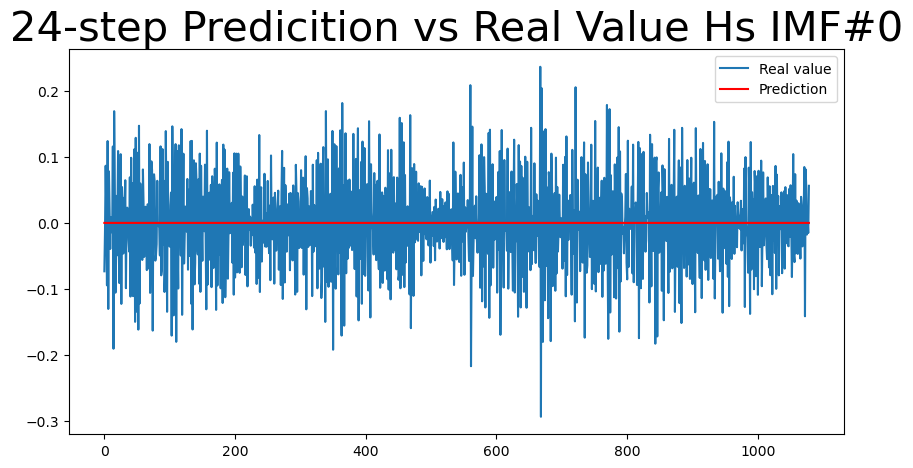

---------------------------------------------
This is  IMF1 :
*********************************************
RMSE : 0.036699688098909534
RRMSE : 530.9155854694371
RRMSE : 530.9155854694371
RRMSE Hamed Definition: 101.03044231046354


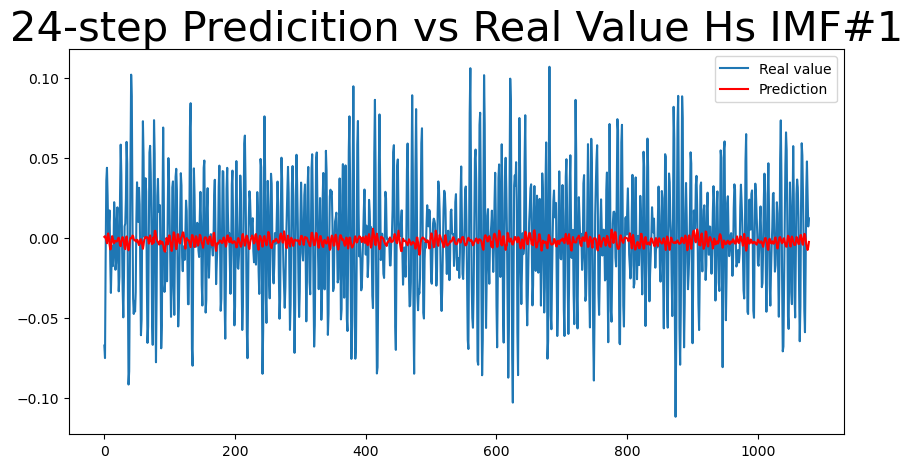

---------------------------------------------
This is  IMF2 :
*********************************************
RMSE : 0.042375167471535455
RRMSE : 349.16755519807805
RRMSE : 349.167555198078
RRMSE Hamed Definition: 102.13599341938753


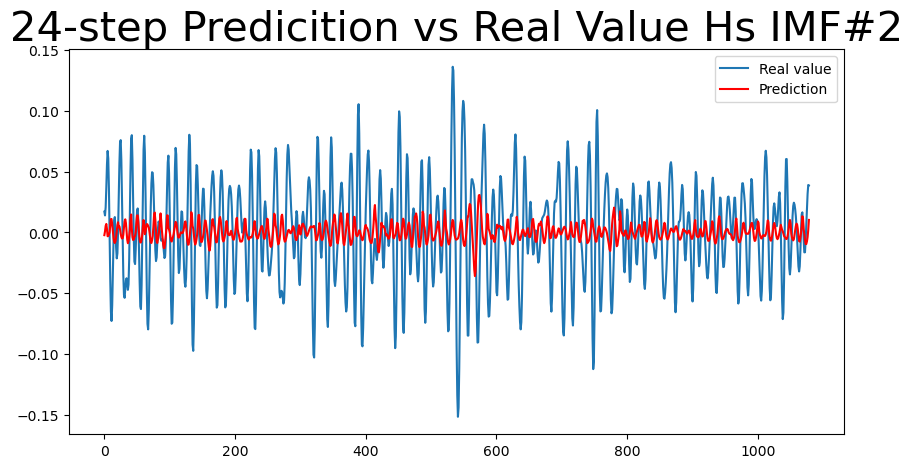

---------------------------------------------
This is  IMF3 :
*********************************************
RMSE : 0.05599602425007306
RRMSE : 4206.640412044269
RRMSE : 4206.640412044269
RRMSE Hamed Definition: 98.06774316254597


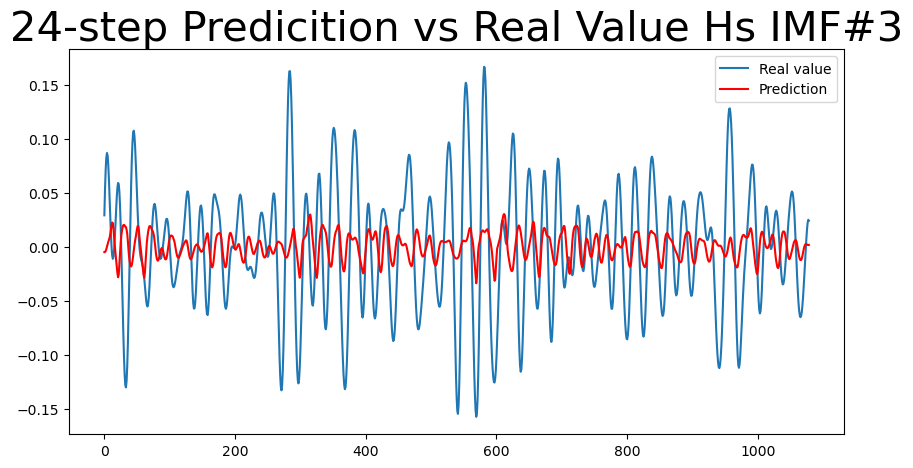

---------------------------------------------
This is  IMF4 :
*********************************************
RMSE : 0.12729912196337154
RRMSE : 647.183506882192
RRMSE : 647.183506882192
RRMSE Hamed Definition: 89.16905262985227


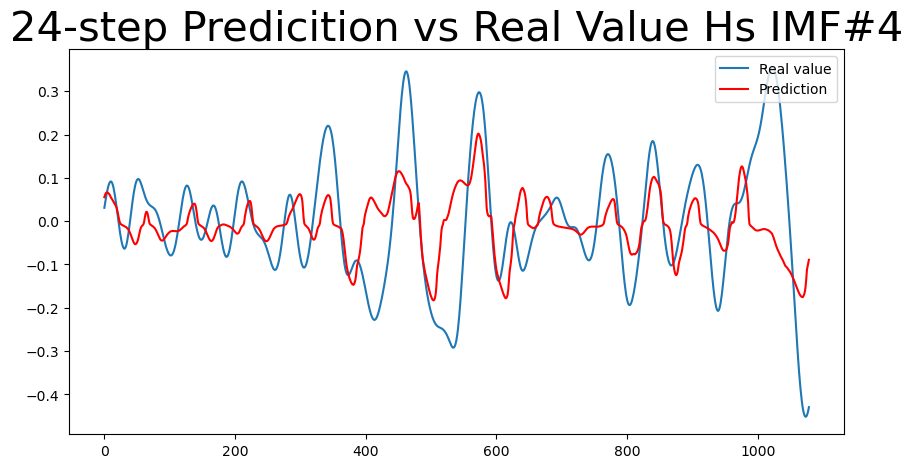

---------------------------------------------
This is  IMF5 :
*********************************************
RMSE : 0.08708065541376439
RRMSE : 389.63367970767354
RRMSE : 389.6336797076736
RRMSE Hamed Definition: 38.022472069869316


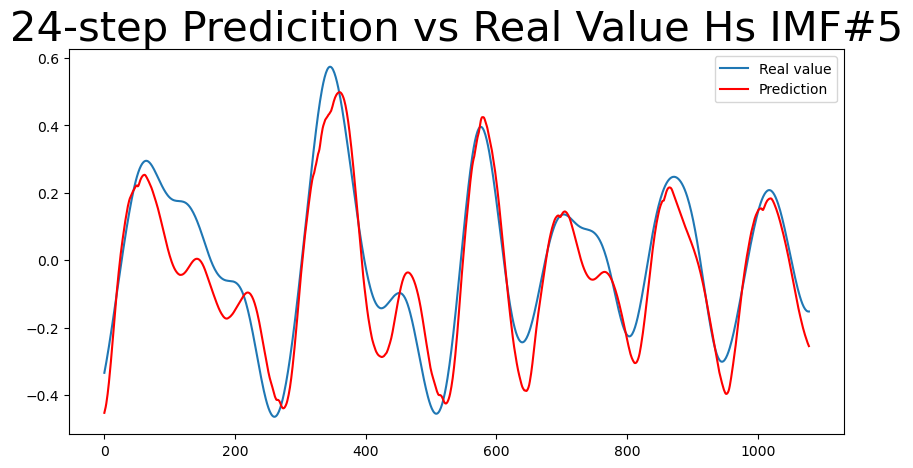

---------------------------------------------
This is  IMF6 :
*********************************************
RMSE : 0.024874964304103426
RRMSE : 1229.647769642107
RRMSE : 1229.647769642107
RRMSE Hamed Definition: 15.869117740570147


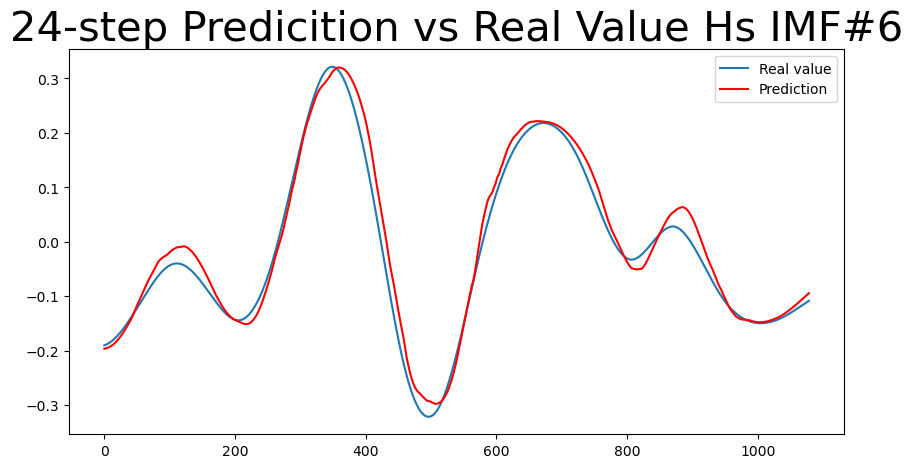

---------------------------------------------
This is  IMF7 :
*********************************************
RMSE : 0.04544068086902979
RRMSE : 1047.0630896332527
RRMSE : 1047.063089633253
RRMSE Hamed Definition: 19.328760942679153


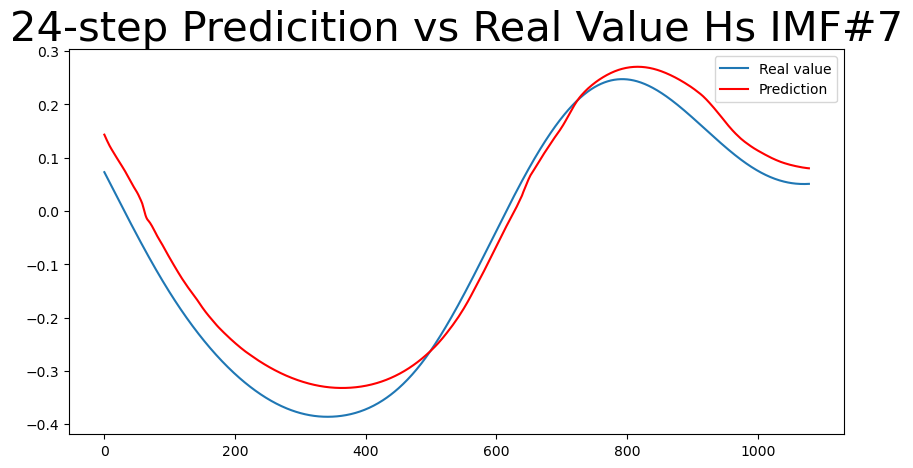

---------------------------------------------
This is  IMF8 :
*********************************************
RMSE : 0.43522144663784856
RRMSE : 8.404410955879257
RRMSE : 8.404410955879259
RRMSE Hamed Definition: 8.25583211680861


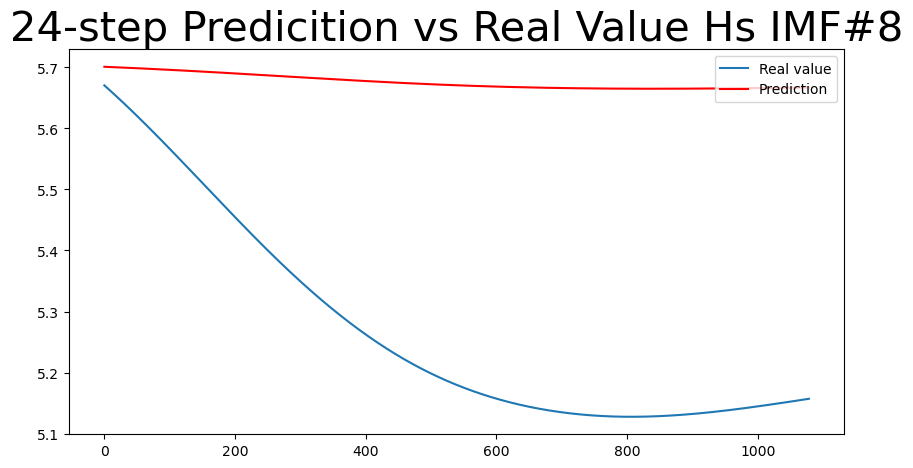

In [6]:
imfs1_prediction = np.array(imfs1_prediction)
prediction1 = [0.0 for i in range(len(test1))]
prediction1 = np.array(prediction1)
for i in range(len(test1)):
    t = 0.0
    for imf1_prediction in imfs1_prediction:
        t += imf1_prediction[i][0]
    prediction1[i] = t
Tests1=np.array(Tests1)

# evaluate forecasts for IMFs seperately
## IMF1

    
for t in range(0,imfs1.shape[0]):
    # plot forecasts against actual outcomes
    print('-'*45)
    print('This is  IMF' + str(t)  + ' :')
    print('*'*45)
    

    ErIndx(Tests1[t,:,0],imfs1_prediction[t,:,0])
    plt.plot(Tests1[t,:,0],label="Real value")
    plt.plot(imfs1_prediction[t,:,0],color='red',label="Prediction")
    plt.legend(loc="upper right")
    plt.title(str(PRE_STEP)+"-step Predicition vs Real Value Hs IMF#"+str(t) ,fontsize=30)
    plt.show()


RMSE : [0.47373325]
RRMSE : [9.76312541]
RRMSE : [9.76312541]
RRMSE Hamed Definition: [9.11431242]
scipy RMSE: 0.473733


c:\Users\ashkanreisi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


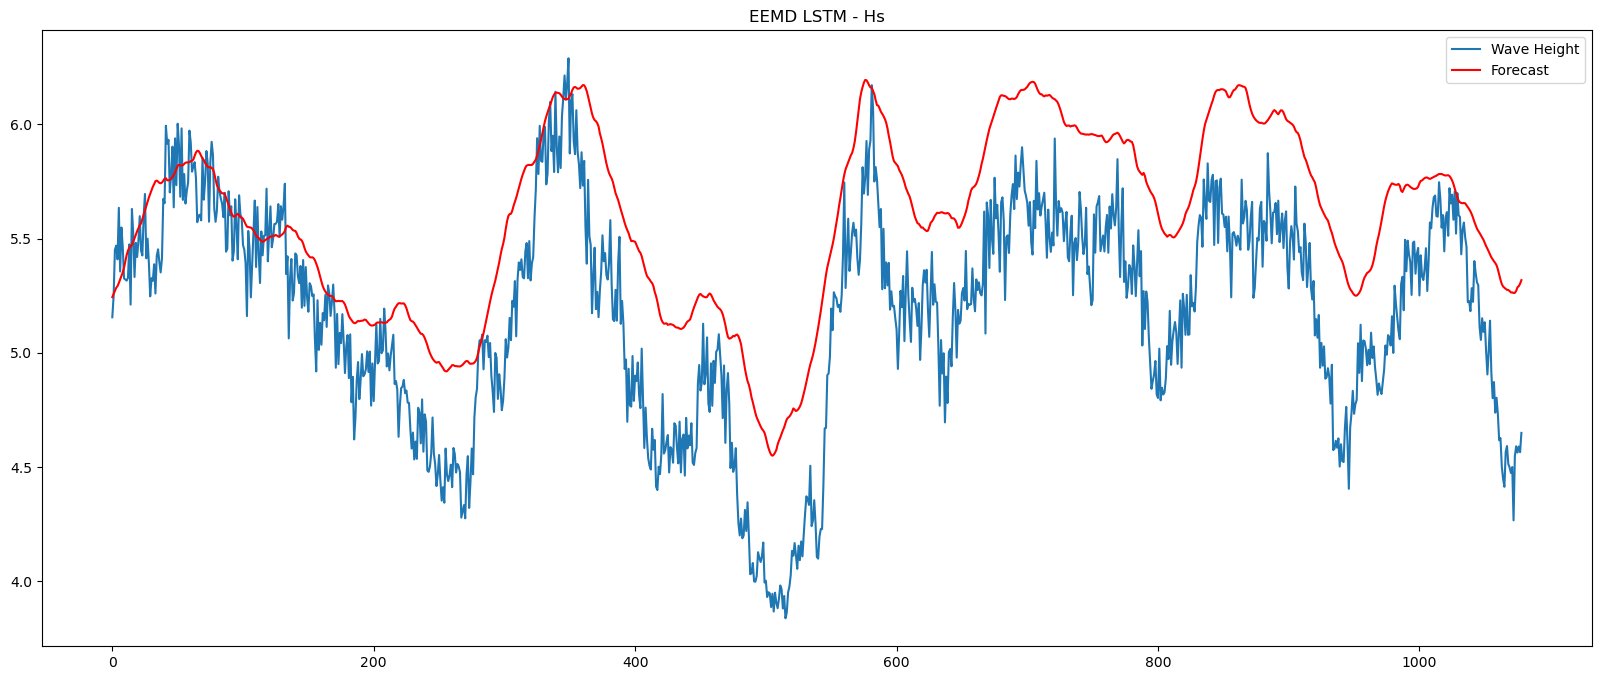

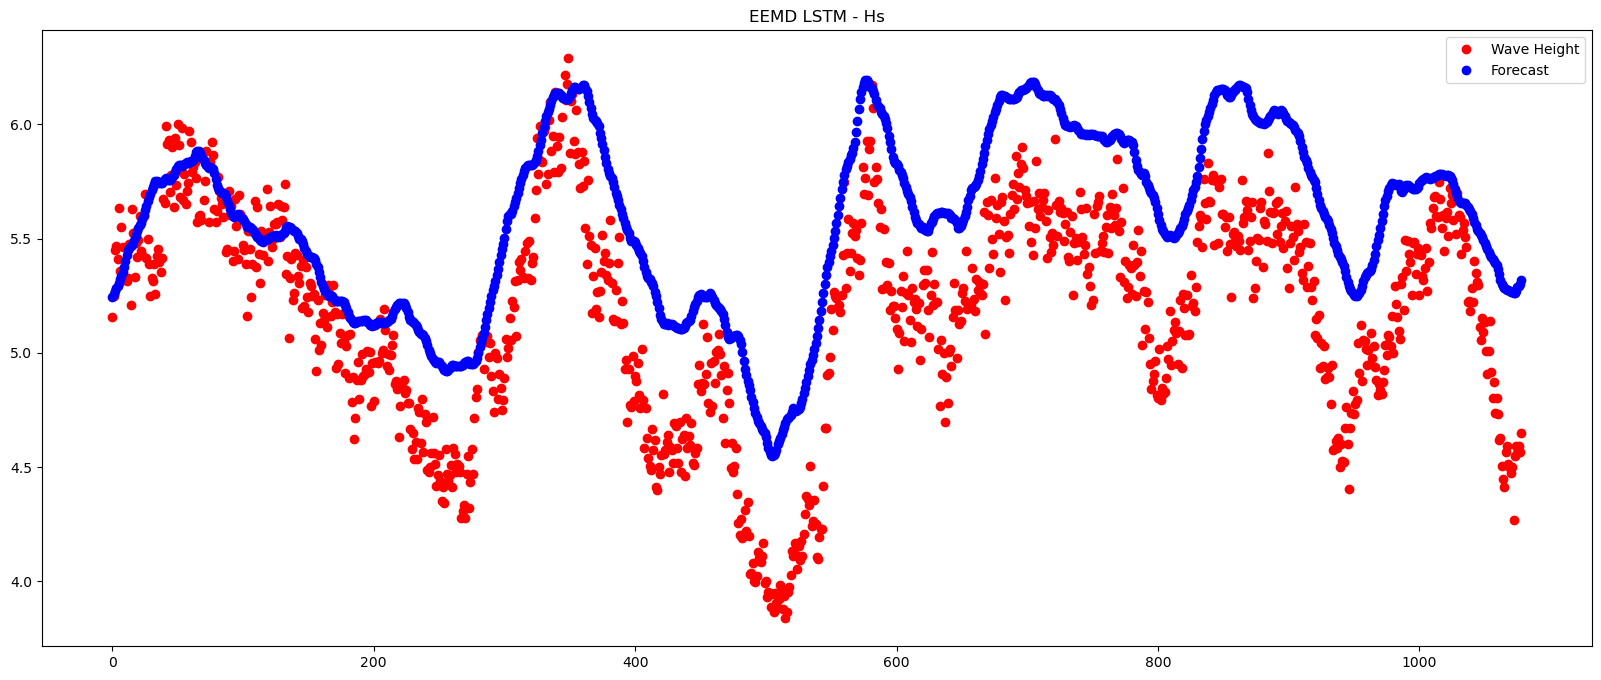

In [7]:
prediction1 = prediction1.reshape(prediction1.shape[0], 1)
test1 = scaler_DO.inverse_transform(test1)
prediction1 = scaler_DO.inverse_transform(prediction1)

fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test1)
plt.plot(prediction1, color='red')
ax.legend(['Wave Height', 'Forecast'])
plt.title("EEMD LSTM - Hs")

ErIndx(test1,prediction1)
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test1,'ro')
plt.plot(prediction1,'bo')
ax.legend(['Wave Height', 'Forecast'])
plt.title("EEMD LSTM - Hs")


#%%
from scipy.stats import linregress

rmse = mean_squared_error(y_true=test1, y_pred=prediction1, squared=False)
print('scipy RMSE: {:.6f}'.format(rmse))





## ***2nd Element ***

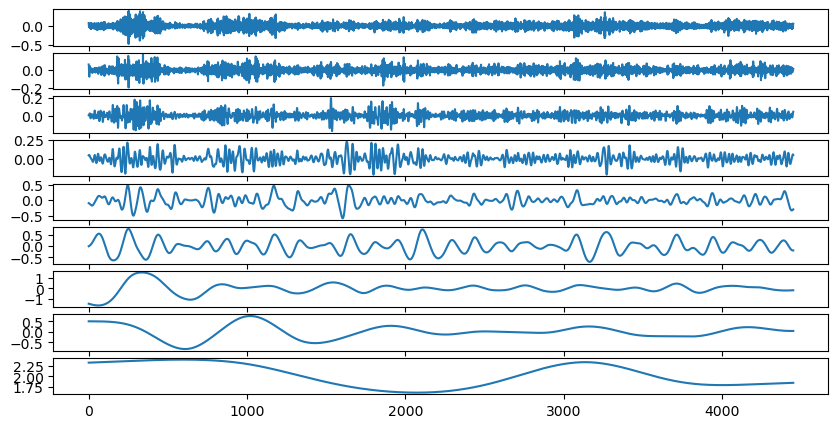

In [ ]:
# ****2nd element****
df = pd.DataFrame(dataset)  
df  = df.fillna(df.interpolate())
do1 = df['APD'][:]
do2 = df['Hs'][:]
do=do2

if do.equals(do1):
    variable='APD'
elif do.equals(do2):
    variable='Hs'    
    
DO = []
for i in range(0, len(do)):
    DO.append([do[i]])
    scaler_DO = MinMaxScaler(feature_range=(np.min(do), np.max(do)))
DO = scaler_DO.fit_transform(DO)

# set IMFs = 8
eemd = EEMD()
eemd.noise_seed(12345)
imfs2 = eemd.eemd(DO.reshape(-1),None,8)

c = int(len(DO) * .75)
# Look back
lookback_window = 10
imfs2_prediction = []

i = 1
for imf in imfs2:
   plt.subplot(len(imfs2), 1, i)
   plt.plot(imf)
   i += 1

plt.savefig('result_imf.png')
plt.show()

# Lead time = 30min*Pre_step ,if prtd
PRE_STEP = 24
test2 = np.zeros([len(DO) - c - lookback_window - PRE_STEP, 1])

In [ ]:
Tests2=[]
i = 1

for imf in imfs2:
    print('-'*45)
    print('This is  ' + str(i)  + '  time(s)')
    print('*'*45)
    X1_train, Y1_train, X1_test, Y1_test = data_split(imf_data(imf,1), c, lookback_window,PRE_STEP)
    X2_train, Y2_train, X2_test, Y2_test = data_split_LSTM(X1_train, Y1_train, X1_test, Y1_test)
    test2 += Y2_test
    model = LSTM_Model(X2_train,Y2_train,i) 
    prediction_Y = model.predict(X2_test)
    imfs2_prediction.append(prediction_Y)
    Tests2.append(Y2_test)
    i+=1

---------------------------------------------
This is  1  time(s)
*********************************************
Epoch 1/100
104/104 - 3s - loss: 0.0062 - mean_squared_error: 0.0062 - 3s/epoch - 29ms/step
Epoch 2/100
104/104 - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - 1s/epoch - 13ms/step
Epoch 3/100
104/104 - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - 1s/epoch - 14ms/step
Epoch 4/100
104/104 - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - 1s/epoch - 14ms/step
Epoch 5/100
104/104 - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - 1s/epoch - 14ms/step
Epoch 6/100
104/104 - 2s - loss: 0.0062 - mean_squared_error: 0.0062 - 2s/epoch - 15ms/step
Epoch 7/100
104/104 - 2s - loss: 0.0062 - mean_squared_error: 0.0062 - 2s/epoch - 14ms/step
Epoch 8/100
104/104 - 2s - loss: 0.0062 - mean_squared_error: 0.0062 - 2s/epoch - 15ms/step
Epoch 9/100
104/104 - 2s - loss: 0.0062 - mean_squared_error: 0.0062 - 2s/epoch - 14ms/step
Epoch 10/100
104/104 - 2s - loss: 0.0062 - mean_squared_erro

---------------------------------------------
This is  IMF0 :
*********************************************
RMSE : 0.06286099928820495
RRMSE : 360.6455752697137
RRMSE : 360.6455752697137
RRMSE Hamed Definition: 100.22838502506772


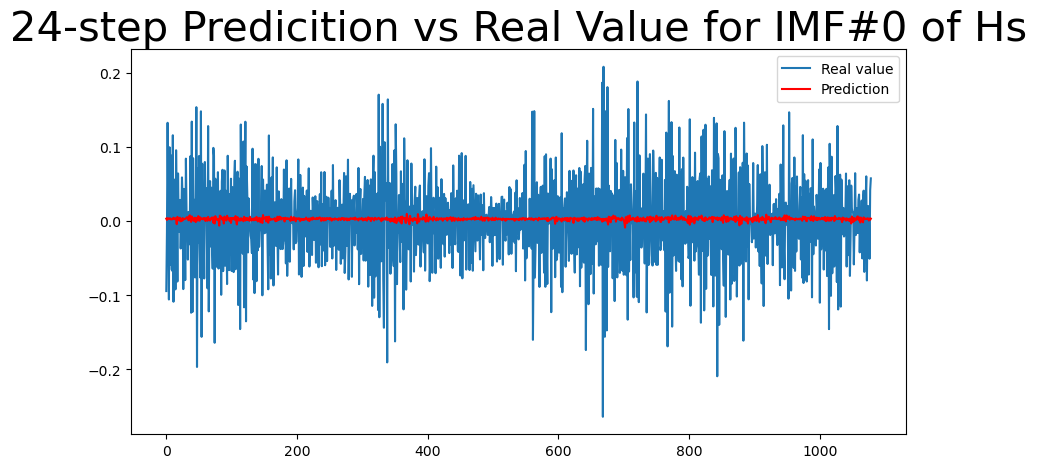

---------------------------------------------
This is  IMF1 :
*********************************************
RMSE : 0.030539783685039904
RRMSE : 173.45424996360742
RRMSE : 173.4542499636074
RRMSE Hamed Definition: 100.40791274461758


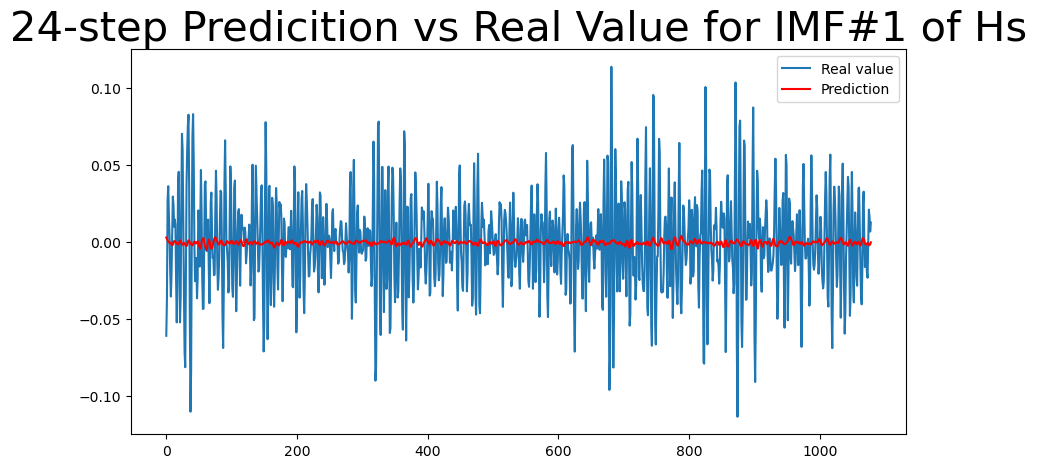

---------------------------------------------
This is  IMF2 :
*********************************************
RMSE : 0.03597195287851398
RRMSE : 407.14382521563175
RRMSE : 407.14382521563175
RRMSE Hamed Definition: 103.30105328051033


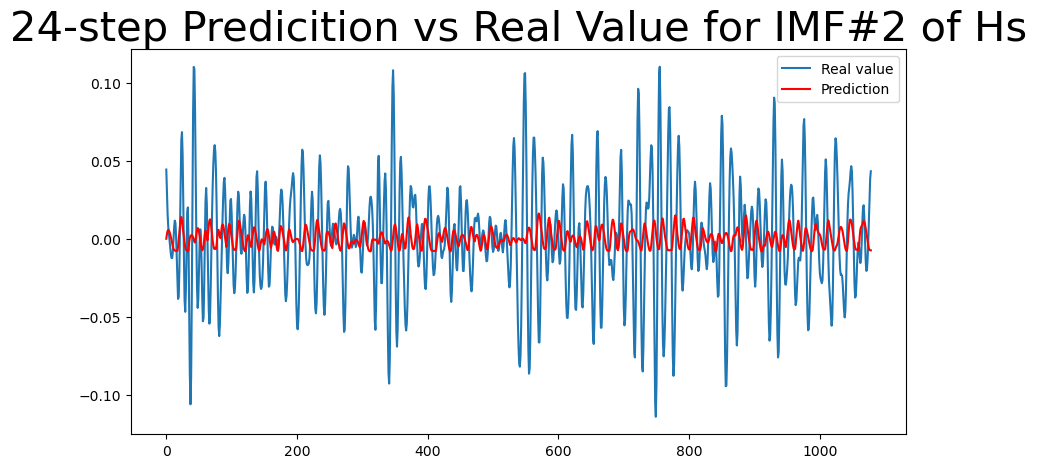

---------------------------------------------
This is  IMF3 :
*********************************************
RMSE : 0.04888128329547124
RRMSE : 212.20582214695574
RRMSE : 212.20582214695574
RRMSE Hamed Definition: 96.97356798061527


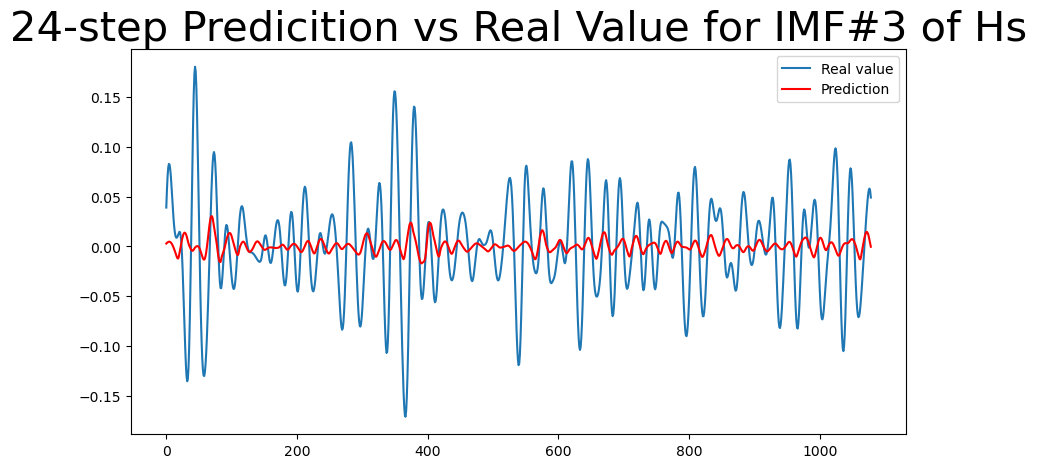

---------------------------------------------
This is  IMF4 :
*********************************************
RMSE : 0.09010693623205239
RRMSE : 1083.3798783316895
RRMSE : 1083.3798783316895
RRMSE Hamed Definition: 86.44115558616939


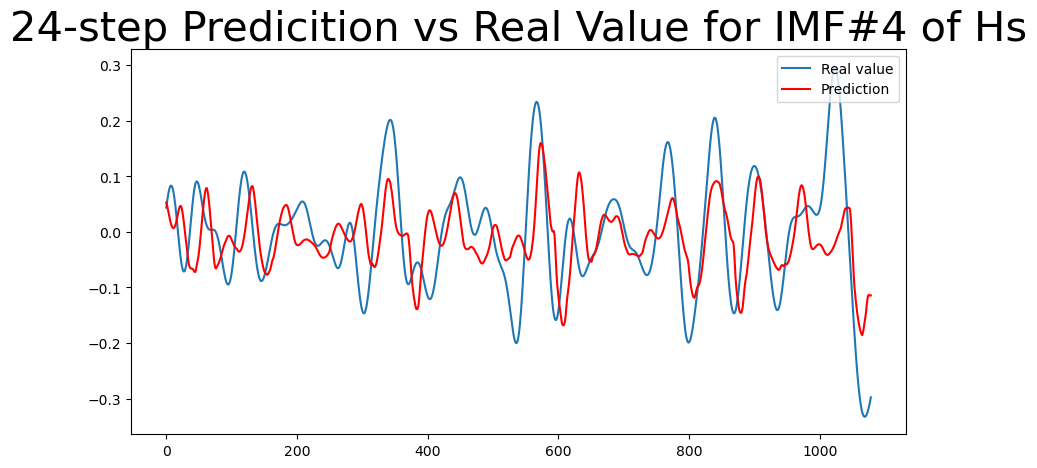

---------------------------------------------
This is  IMF5 :
*********************************************
RMSE : 0.07993834232275868
RRMSE : 1400.2779070345812
RRMSE : 1400.2779070345812
RRMSE Hamed Definition: 38.1659517003834


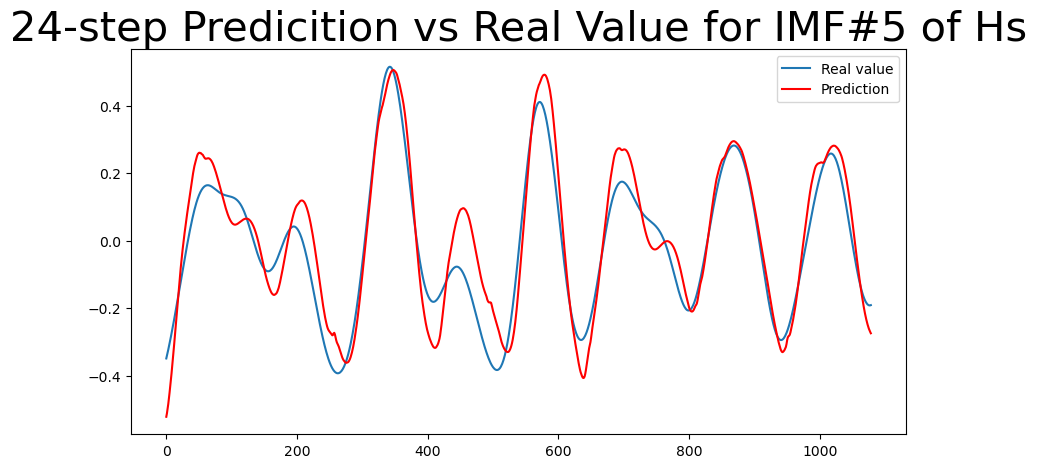

---------------------------------------------
This is  IMF6 :
*********************************************
RMSE : 0.04873716601586355
RRMSE : 300.93723349682784
RRMSE : 300.93723349682784
RRMSE Hamed Definition: 23.167133992406473


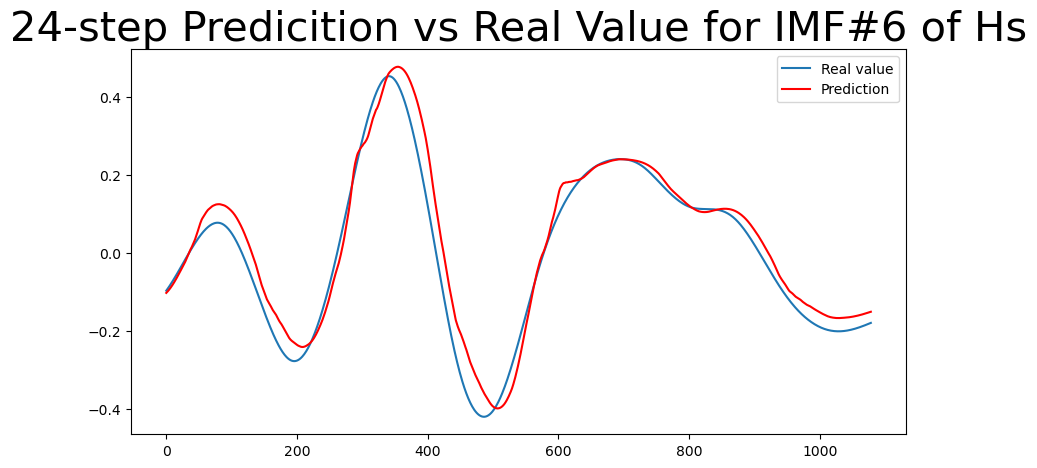

---------------------------------------------
This is  IMF7 :
*********************************************
RMSE : 0.02514630458463566
RRMSE : 62.426121007447186
RRMSE : 62.426121007447186
RRMSE Hamed Definition: 15.079843977603218


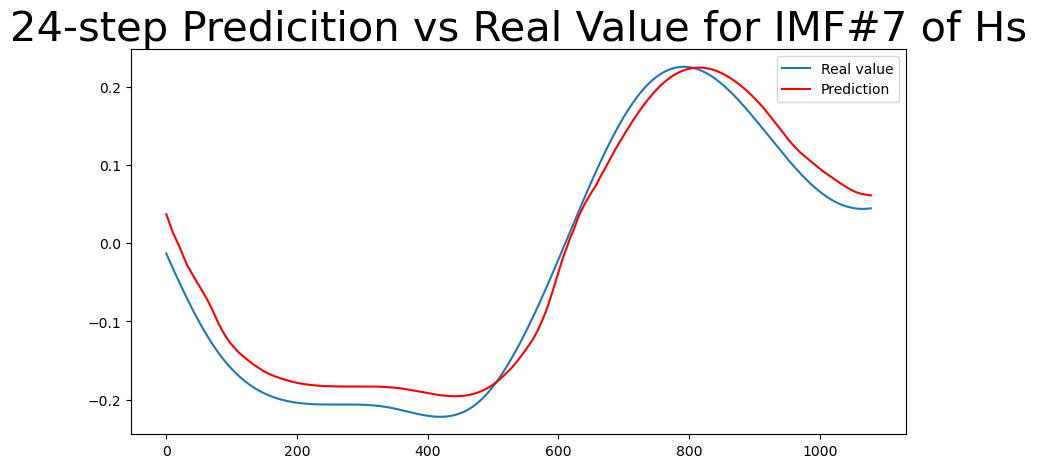

---------------------------------------------
This is  IMF8 :
*********************************************
RMSE : 0.3818652575207236
RRMSE : 20.81391003672266
RRMSE : 20.81391003672266
RRMSE Hamed Definition: 20.164112257019205


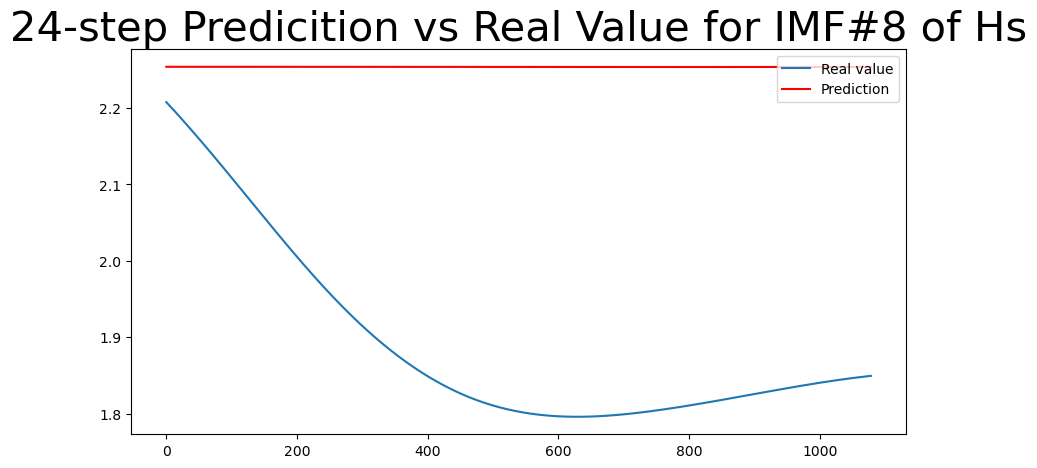

In [11]:
imfs2_prediction = np.array(imfs2_prediction)
prediction2 = [0.0 for i in range(len(test2))]
prediction2 = np.array(prediction2)
for i in range(len(test2)):
    t = 0.0
    for imf2_prediction in imfs2_prediction:
        t += imf2_prediction[i][0]
    prediction2[i] = t
Tests2=np.array(Tests2)

# evaluate forecasts for IMFs seperately
    
for t in range(0,imfs2.shape[0]):
    # plot forecasts against actual outcomes
    print('-'*45)
    print('This is  IMF' + str(t)  + ' :')
    print('*'*45)
    

    ErIndx(Tests2[t,:,0],imfs2_prediction[t,:,0])
    plt.plot(Tests2[t,:,0],label="Real value")
    plt.plot(imfs2_prediction[t,:,0],color='red',label="Prediction")
    plt.legend(loc="upper right")
    plt.title(str(PRE_STEP)+"-step Predicition vs Real Value for IMF#"+str(t)+" of "+str(variable) ,fontsize=30)
    plt.show()


RMSE : [0.22206356]
RRMSE : [6.64626356]
RRMSE : [6.64626356]
RRMSE Hamed Definition: [6.11978308]
scipy RMSE: 0.222064


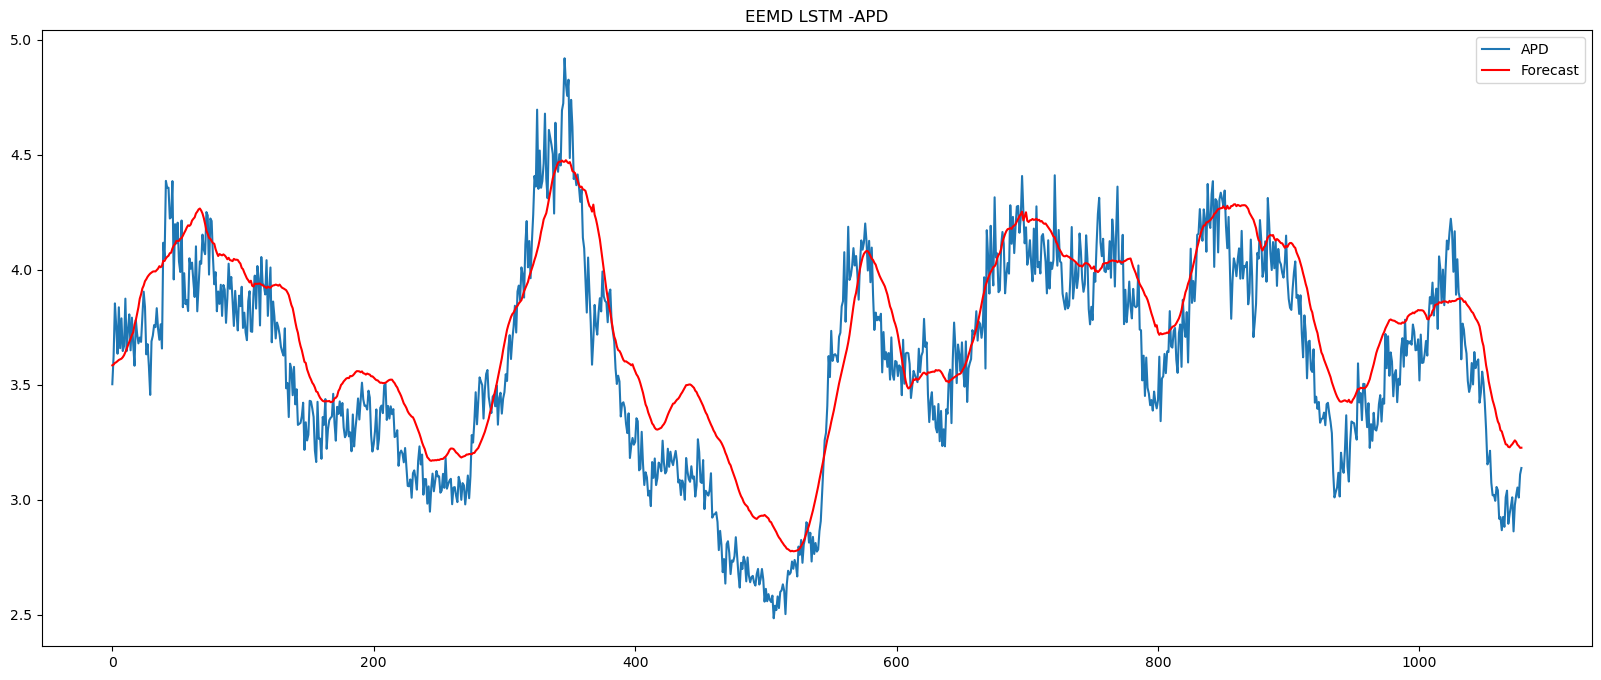

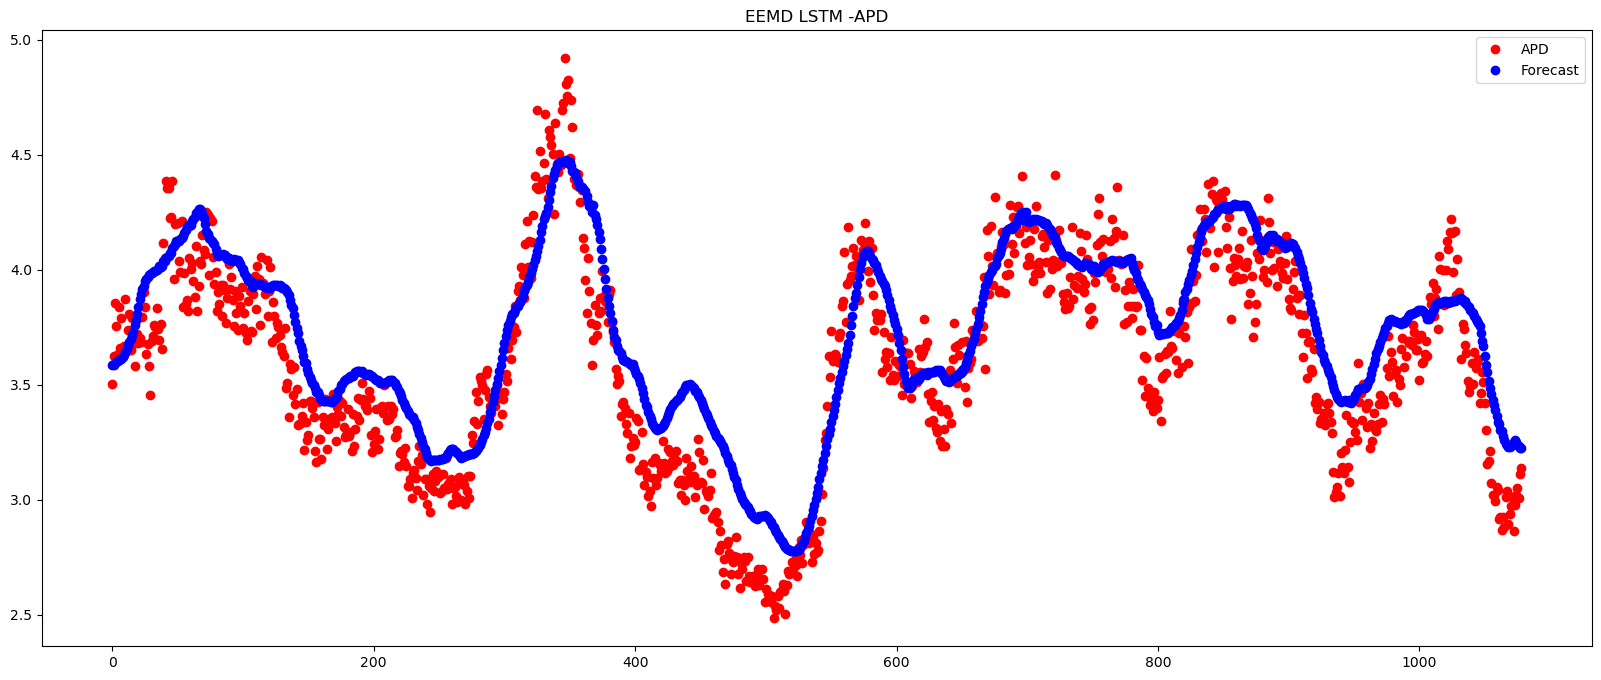

In [27]:
prediction2 = prediction2.reshape(prediction2.shape[0], 1)
test2 = scaler_DO.inverse_transform(test2)
prediction2 = scaler_DO.inverse_transform(prediction2)

fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test2)
plt.plot(prediction2, color='red')
ax.legend([str(variable), 'Forecast'])
plt.title("EEMD LSTM -"+str(variable))

ErIndx(test2,prediction2)
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test2,'ro')
plt.plot(prediction2,'bo')
ax.legend([str(variable), 'Forecast'])
plt.title("EEMD LSTM -"+str(variable))


#%%
from scipy.stats import linregress

rmse = mean_squared_error(y_true=test2, y_pred=prediction2, squared=False)
print('scipy RMSE: {:.6f}'.format(rmse))





RMSE : [0.46489343]
RRMSE : [31.2106461]
RRMSE : [31.2106461]
RRMSE Hamed Definition: [24.52576219]
scipy RMSE: 0.464893


c:\Users\ashkanreisi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


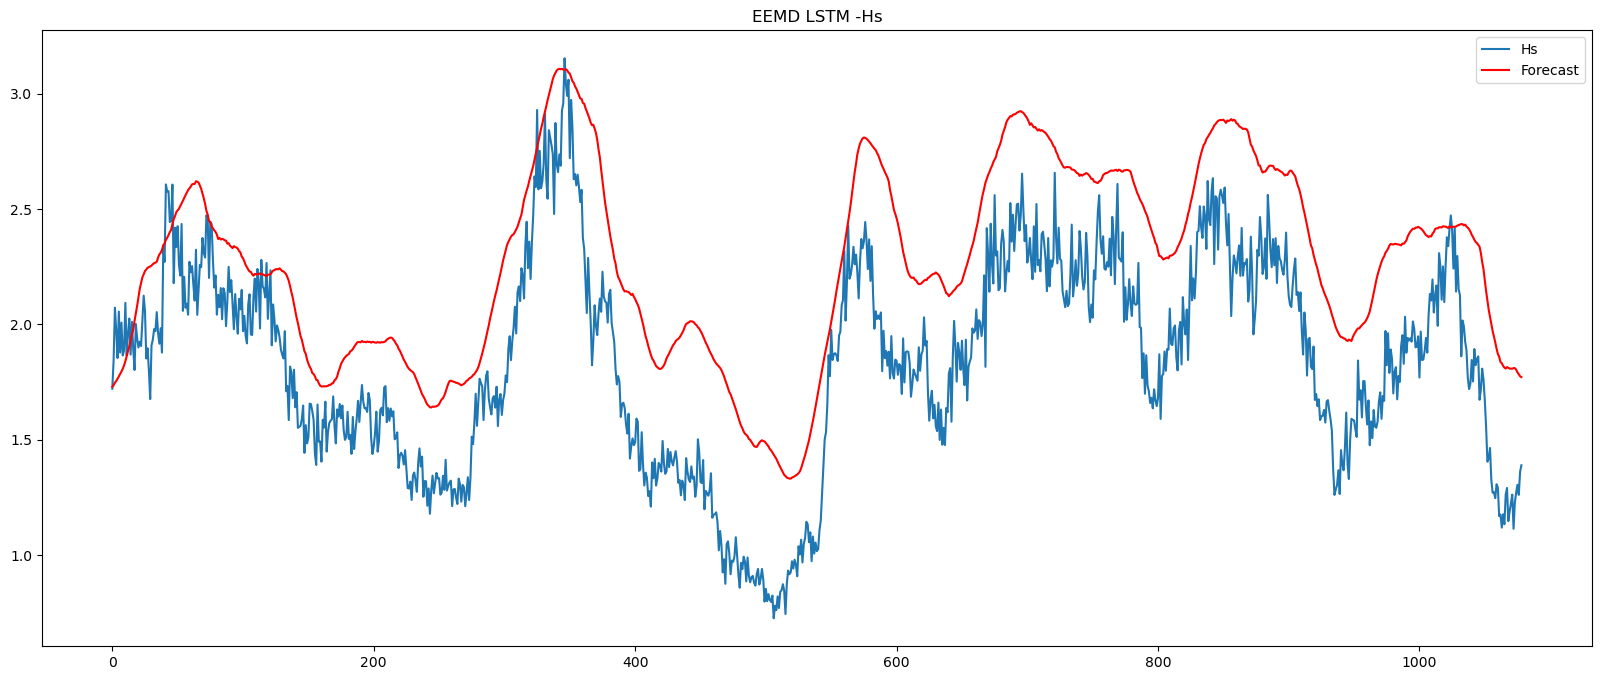

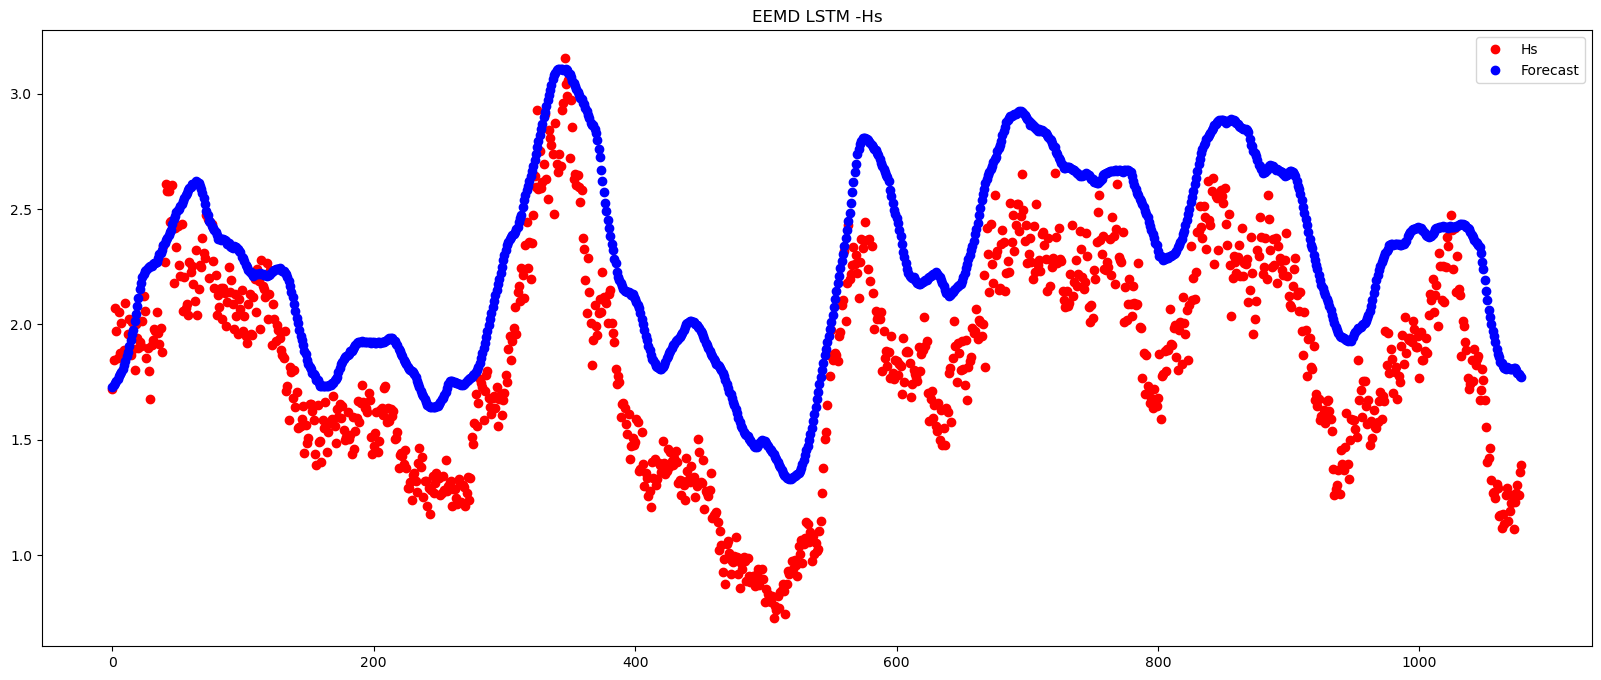

In [12]:
prediction2 = prediction2.reshape(prediction2.shape[0], 1)
test2 = scaler_DO.inverse_transform(test2)
prediction2 = scaler_DO.inverse_transform(prediction2)

fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test2)
plt.plot(prediction2, color='red')
ax.legend([str(variable), 'Forecast'])
plt.title("EEMD LSTM -"+str(variable))

ErIndx(test2,prediction2)
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(test2,'ro')
plt.plot(prediction2,'bo')
ax.legend([str(variable), 'Forecast'])
plt.title("EEMD LSTM -"+str(variable))


#%%
from scipy.stats import linregress

rmse = mean_squared_error(y_true=test2, y_pred=prediction2, squared=False)
print('scipy RMSE: {:.6f}'.format(rmse))


In [13]:
# ****In case prediction 2 = Hs 997*9.81*9.81*do1*do2*do2/((64*3.14))
PredictedEnergy=prediction2*prediction2*prediction1*9.81*9.81*997/(64*3.14)
IndirectEnergy=test2*test2*test1*9.81*9.81*997/(64*3.14)

RMSE : [5884.201898]
RRMSE : [96.08291436]
RRMSE : [96.08291436]
RRMSE Hamed Definition: [56.29018015]
scipy RMSE: 5884.201898


c:\Users\ashkanreisi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


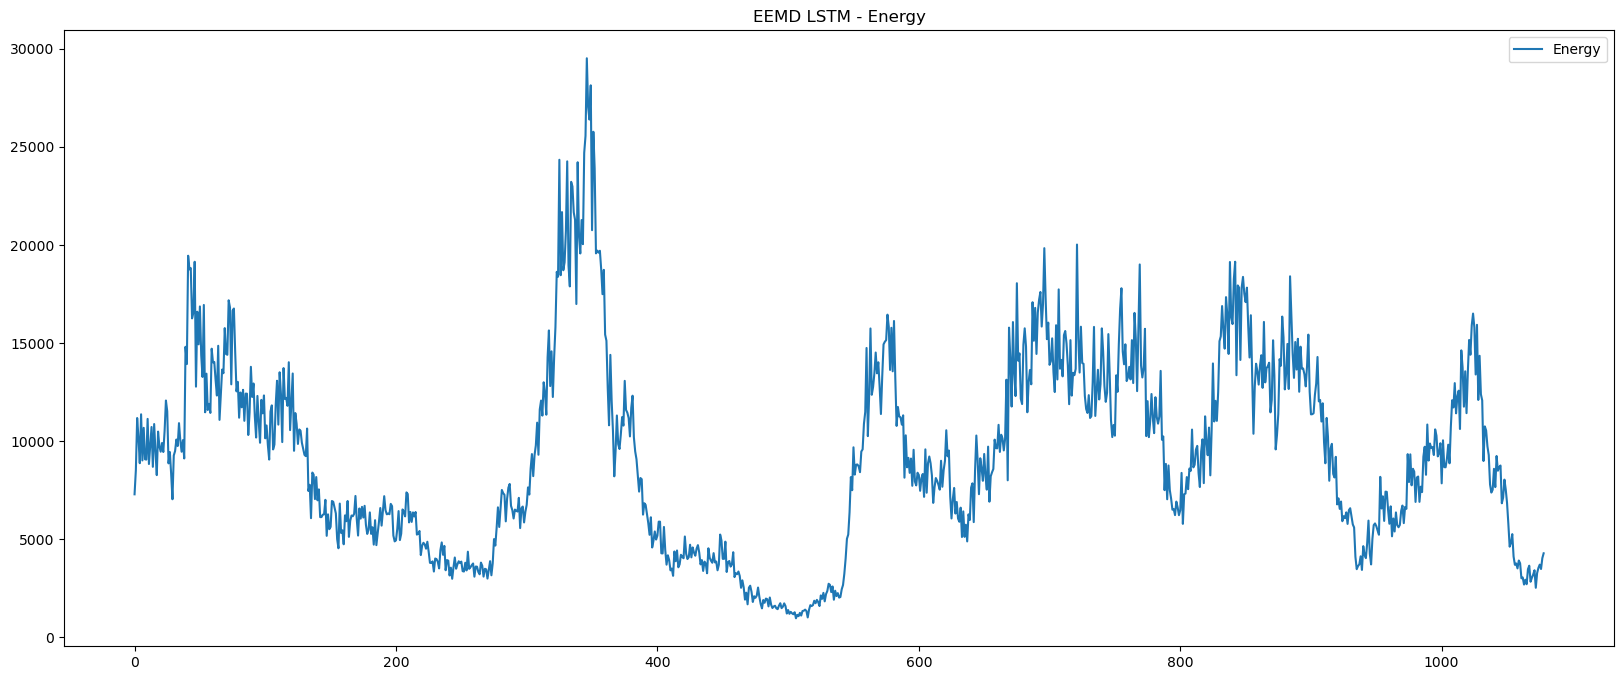

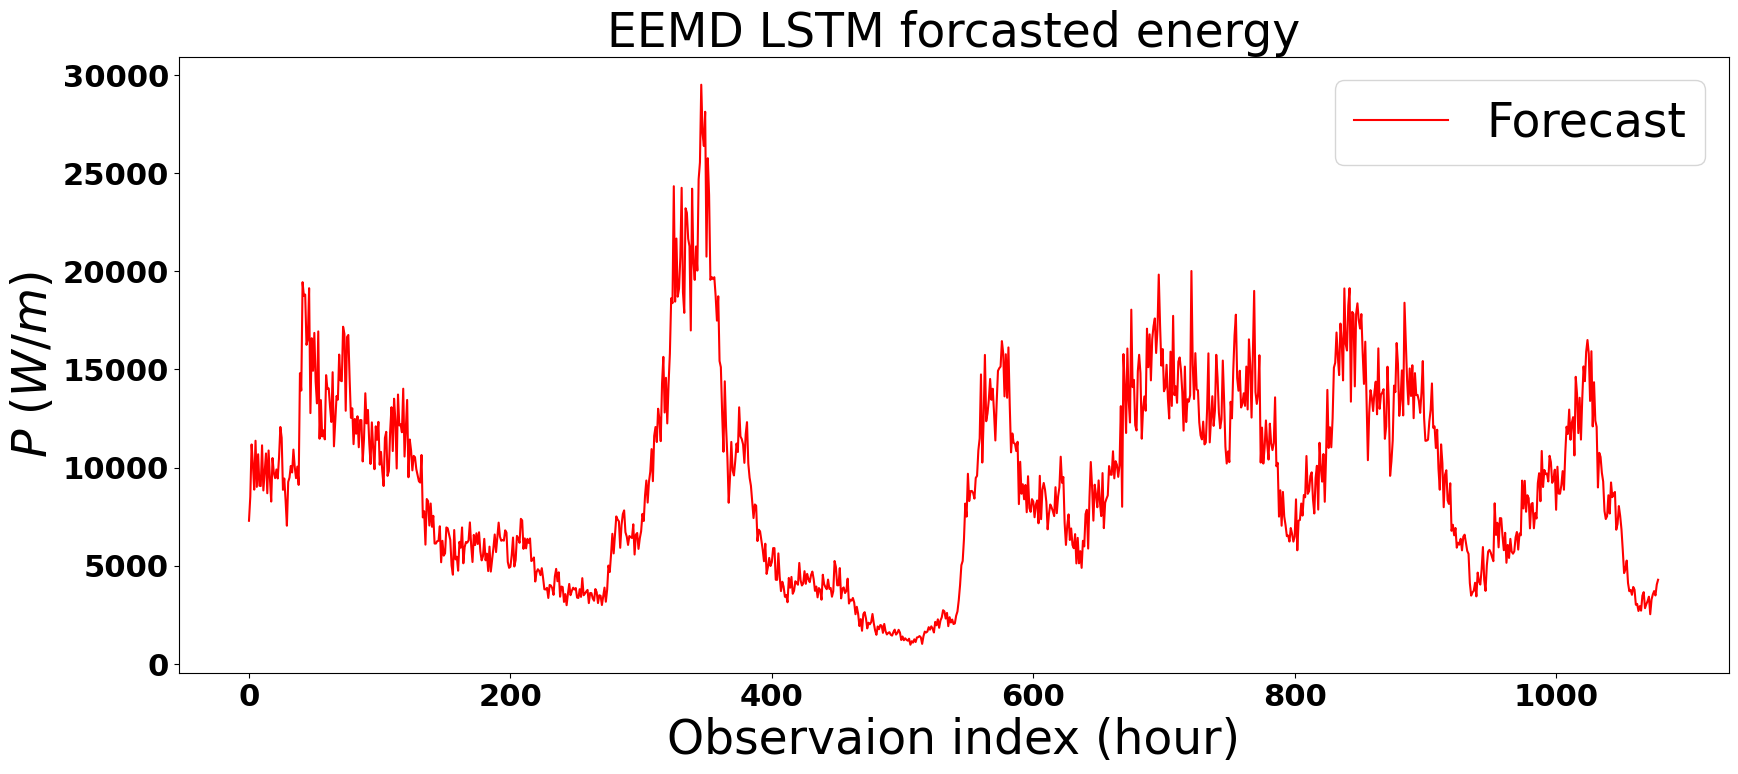

In [19]:

fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(IndirectEnergy)
#plt.plot(PredictedEnergy, color='red')
ax.legend(['Energy', 'Forecast'])
plt.title("EEMD LSTM - Energy")

ErIndx(IndirectEnergy,PredictedEnergy)
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(IndirectEnergy,'r')
#plt.plot(PredictedEnergy,'bo')
ax.legend(['Forecast'],fontsize=34)
plt.title("EEMD LSTM forcasted energy",fontsize=34)
plt.xlabel(r'Observaion index (hour)', fontsize=34)
plt.ylabel(r'$P$ $(W/m)$', fontsize=34)
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')


#%%
from scipy.stats import linregress

rmse = mean_squared_error(y_true=IndirectEnergy, y_pred=PredictedEnergy, squared=False)
print('scipy RMSE: {:.6f}'.format(rmse))